In [1]:
import numpy as np
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
## Loading Model

In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [5]:
## Visualizing single image from test set

In [4]:
# !pip install opencv-python

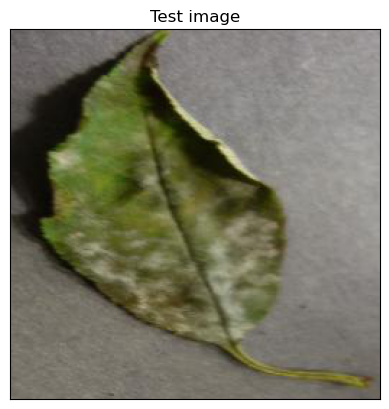

In [4]:
# pip install opencv-python (in terminal or here)
import cv2
image_path = "train/Cherry_(including_sour)___Powdery_mildew/00d12ac0-a293-47e0-a4c6-a80f37204c39___FREC_Pwd.M 4812.JPG"
#read image
img = cv2.imread(image_path)

# convert from bgr to rgb
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#display image
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()



## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size = (128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
# convert single image to batch
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [6]:
prediction = model.predict(input_arr)
prediction, prediction.shape
#Show probability of image of each class

1/1 [==============================] - 0s 157ms/step


2024-04-30 12:30:43.229532: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


(array([[3.8523052e-04, 4.5644239e-05, 2.1475403e-02, 1.6072656e-04,
         9.4740726e-03, 9.4792700e-01, 9.9090576e-05, 2.6493671e-04,
         3.9468373e-06, 7.9237725e-06, 1.7119804e-05, 2.3039599e-06,
         1.7100801e-06, 5.7529274e-07, 5.9845752e-07, 7.5903758e-03,
         2.1718750e-03, 2.5253461e-03, 1.3584397e-03, 3.7774602e-03,
         2.0834514e-05, 2.2340375e-04, 3.8111937e-04, 2.7356875e-05,
         4.7650850e-05, 6.8225192e-05, 1.2476096e-05, 3.7049307e-05,
         3.0187332e-05, 6.9708425e-05, 1.1567927e-03, 4.9291477e-05,
         7.6330334e-06, 2.8207489e-05, 4.5487954e-04, 2.8908153e-05,
         3.4554472e-05, 3.1722760e-05]], dtype=float32),
 (1, 38))

In [7]:
result_index = np.argmax(prediction)
result_index

5

In [8]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

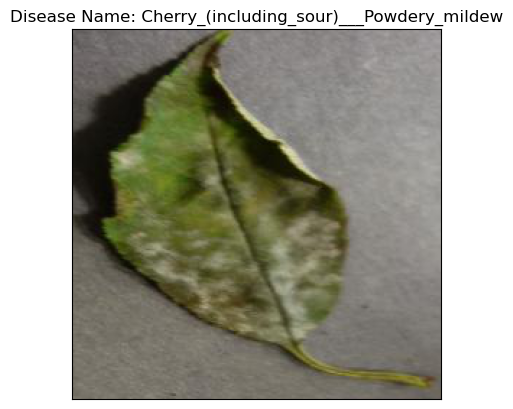

'Cherry_(including_sour)___Powdery_mildew'

In [9]:
#displaying result
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

model_prediction